# Wine Quality with PCA

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://c1.staticflickr.com/5/4124/5096953439_5a41df8055_b.jpg")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv('winequality-red.csv', sep=';')

In [6]:
#to see the memory and type constraints
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# to check the statistical measure of features
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Checking if there is any nulls existing in the data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
#Unique values from quality
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [18]:
#Unique values counts in quality column
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

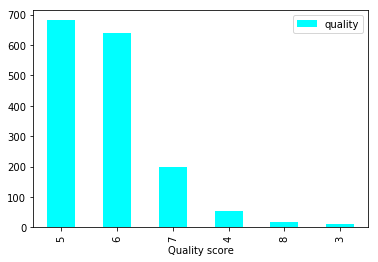

In [19]:
#Distribution of Red Wine Quality
data["quality"].value_counts().plot.bar(color='Aqua')
plt.xlabel("Quality score")
plt.legend()

In [20]:
#dimensions of data
data.shape

(1599, 12)

In [21]:
#Splitting data into dependent and independent
X = df.iloc[:, 0:10].values
y = df.iloc[:, 11].values

In [22]:
print(X)

[[7.4     0.7     0.      ... 0.9978  3.51    0.56   ]
 [7.8     0.88    0.      ... 0.9968  3.2     0.68   ]
 [7.8     0.76    0.04    ... 0.997   3.26    0.65   ]
 ...
 [6.3     0.51    0.13    ... 0.99574 3.42    0.75   ]
 [5.9     0.645   0.12    ... 0.99547 3.57    0.71   ]
 [6.      0.31    0.47    ... 0.99549 3.39    0.66   ]]


In [23]:
print(y)

[5 5 5 ... 6 5 6]


In [25]:
#Splitting into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
ex = pca.explained_variance_ratio_

In [29]:
pca.n_components_

3

In [33]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -2.77555756e-16],
       [ 0.00000000e+00,  1.66533454e-16,  1.00000000e+00]])

In [43]:
pca.

False

In [31]:
explained_variance

array([0.30977348, 0.18056188, 0.13178232])

### The main idea to apply PCA here, is to check the covariance between the features and eliminate the ones with shows less covariance towards dependent variable